In [1]:
# Dependencies
import tweepy
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
#get api keys
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [3]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [4]:
# Target User Account
#**BBC, CBS, CNN, Fox, and New York times**.
target_terms = ("@BBC", "@CBS", "@CNN", "@Fox","@NYtimes")

# List to hold results
tweets_list = []

In [5]:
# Loop through all target users

sentiments = []
for target in target_terms:
    counter = 1
    tweepy = api.user_timeline(target, count = 100 )

    for tweet in tweepy:
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        sentiments.append({
            "twitter source account" : target,
            "Tweets ago" : tweets_ago,
            "Date" : tweet['created_at'],
            "Compound" : compound,
            'Negative' : neg,
            "Positive"  : pos,
            "Neutral"  : neu,
            "tweet_text" : tweet["text"]
            
        })
        counter = counter + 1        

data_df = pd.DataFrame.from_dict(sentiments)
data_df.to_csv("Twitter_ouput.csv")
                    

<Figure size 720x720 with 0 Axes>

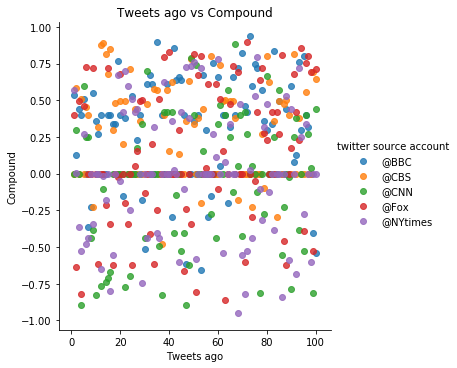

In [6]:
def scatter_plot(xaxis,yaxis):
    plt.figure(figsize=(10,10))
    g =sns.lmplot(xaxis, yaxis, data=data_df, hue="twitter source account",fit_reg=False)
    plt.title(f"{xaxis } vs {yaxis}")
    plt.savefig("output_scatterplot.png")
    plt.show()
    return
scatter_plot("Tweets ago","Compound")

In [7]:
grpby_df=data_df.groupby("twitter source account").mean()["Compound"]
grpby_df

twitter source account
@BBC        0.277030
@CBS        0.255300
@CNN       -0.042003
@Fox        0.127416
@NYtimes    0.004519
Name: Compound, dtype: float64

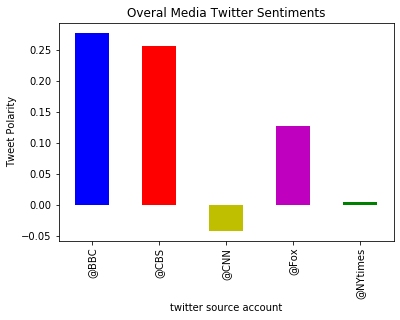

<Figure size 432x288 with 0 Axes>

In [8]:
ax=grpby_df.plot.bar(color = ['b', 'r', 'y', 'm', 'g'])
#ax.set_ylim([-0.1, 0.3])
plt.title("Overal Media Twitter Sentiments")
plt.ylabel("Tweet Polarity")
plt.savefig("output_barplot.png")
plt.show()
plt.tight_layout()